In [1]:
import random
import numpy as np
import queueing_tool as qt
import pandas as pd

Define service function

In [2]:
def service_f(t: float):
    """Define deterministic service time.\n
    Take the arrival time as t and add a constant.

    Args:
        t (float): current time
    """
    return t + 0.00112

def identity(t: float):
    """Handler function for returning the current time

    Args:
        t (float): current time

    Returns:
        (float): current time
    """
    return t

In [3]:
def arr_slow(t: float):
    """Return arrival time with slow rate

    Args:
        t (float): current time

    Returns:
        (float): arrival time
    """
    return t + random.expovariate(lambd=125)

def arr_fast(t: float):
    """Return arrival time with fast rate

    Args:
        t (float): current time

    Returns:
        (float): arrival time
    """
    return t + random.expovariate(lambd=500)

Define the two agents:
- slow agents that go through the whole system
- fast agents that overload the system and leave

In [4]:
class FastAgent(qt.Agent):
    def __init__(self, agent_id=(0, 0)):
        super().__init__(agent_id)
        self.agent_id = (agent_id[0], agent_id[1], 'fast')
        
class SlowAgent(qt.Agent):
    def __init__(self, agent_id=(0, 0)):
        super().__init__(agent_id)
        self.agent_id = (agent_id[0], agent_id[1], 'slow')

System definition

```mermaid
---
title: One-node M/D/1 system
---
  graph LR;
  A("Entry point")
  B("Leaving point")
  λ0("slow λ")
  λ1("fast λ")

      λ0 --> A
      λ1 --> node
      A --> node --> B
```

In [8]:
# Prepare the one-node network
q_classes = { 1: qt.QueueServer, 2: qt.QueueServer, 3: qt.QueueServer }

adja_list = {
    0: [2],
    1: [2],
    2: [3]
}
edge_list = {
    0: {2: 1},
    1: {2: 2},
    2: {3: 3}
}
g = qt.adjacency2graph(
    adjacency=adja_list,
    edge_type=edge_list
)

q_args = {
    1: {
        'arrival_f': arr_slow,
        'service_f': identity,
        'AgentFactory': SlowAgent,
    },
    2: {
        'arrival_f': arr_fast,
        'service_f': identity,
        'AgentFactory': FastAgent,
    },
    3: {
        'service_f': service_f,
    },
}

qn = qt.QueueNetwork(
    g= g, q_classes=q_classes, q_args=q_args
)

Simulate

In [9]:
qn.max_agents = np.infty

qn.initialize(edge_type=[1, 2])
qn.start_collecting_data()
qn.simulate(n=200)
dat = qn.get_agent_data(return_header=True)

for k, v in dat[0].items():
    print(dat[1])
    print(k)
    print(v)

arrival,service,departure,num_queued,num_total,q_id
(0, 0, 'slow')
[[0.00359875 0.00359875 0.00359875 0.         1.         0.        ]
 [0.00359875 0.00359875 0.00471875 0.         1.         2.        ]
 [0.00471875 0.         0.         0.         0.         3.        ]]
arrival,service,departure,num_queued,num_total,q_id
(0, 1, 'slow')
[[0.00720497 0.00720497 0.00720497 0.         1.         0.        ]
 [0.00720497 0.00720497 0.00832497 0.         1.         2.        ]
 [0.00832497 0.         0.         0.         0.         3.        ]]
arrival,service,departure,num_queued,num_total,q_id
(0, 2, 'slow')
[[0.01090683 0.01090683 0.01090683 0.         1.         0.        ]
 [0.01090683 0.01090683 0.01202683 0.         1.         2.        ]
 [0.01202683 0.         0.         0.         0.         3.        ]]
arrival,service,departure,num_queued,num_total,q_id
(0, 3, 'slow')
[[0.02253502 0.02253502 0.02253502 0.         1.         0.        ]
 [0.02253502 0.02389347 0.02501347 2.  

c:\Users\marco_\Documents\Queueing_project\queueing\venv\Lib\site-packages\queueing_tool\network\queue_network.py:566: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  animation = FuncAnimation(**animation_args)


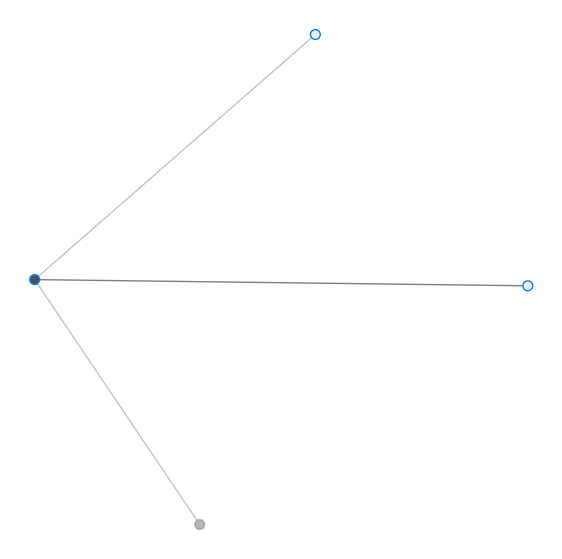

c:\Users\marco_\Documents\Queueing_project\queueing\venv\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [7]:
qn.animate()